<a href="https://colab.research.google.com/github/vinpala/ILoveNumbers/blob/master/MNIST_classification_custom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting MNIST data


In [0]:
import os
import scipy.misc
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

From this site: http://yann.lecun.com/exdb/mnist/

      train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
      train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
      t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
      t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [0]:
!ls

In [0]:
!ls MNIST_data

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [0]:
train_images_path = "MNIST_data/train-images-idx3-ubyte.gz"
train_labels_path = "MNIST_data/train-labels-idx1-ubyte.gz"

test_images_path = "MNIST_data/t10k-images-idx3-ubyte.gz"
test_labels_path = "MNIST_data/t10k-labels-idx1-ubyte.gz"

In [0]:
# load training images binary file
with open(train_images_path, 'rb') as f:
  train_images = extract_images(f)
# load training labels binary file
with open(train_labels_path, 'rb') as f:
  train_labels = extract_labels(f, one_hot=True)


# load test images binary file
with open(test_images_path, 'rb') as f:
  test_images = extract_images(f)
# load test labels binary file
with open(test_labels_path, 'rb') as f:
  test_labels = extract_labels(f, one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
#set(train_labels)

In [0]:
train_images[0].shape

(28, 28, 1)

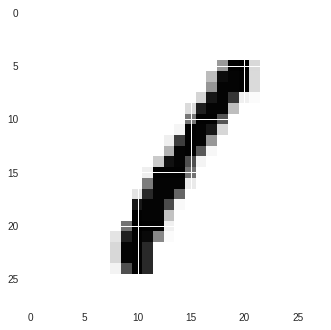

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[3].reshape(28,28))

In [0]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
#train_images.reshape(train_images.shape[0],-1).shape

In [0]:
test_images.shape

(10000, 28, 28, 1)

# Set up datasets for training

In [0]:
#!rm -r mnist

In [0]:
VALIDATION_SIZE = 500

In [0]:
validation_images = train_images[:VALIDATION_SIZE]
validation_labels = train_labels[:VALIDATION_SIZE]
train_images = train_images[VALIDATION_SIZE:]
train_labels = train_labels[VALIDATION_SIZE:]

In [0]:
def preprocess(images):
    #normalize
    images = images.astype('float32') / 255
    return images

In [0]:
validation_images = preprocess(validation_images)
train_images = preprocess(train_images)
test_images = preprocess(test_images)

In [0]:
validation_images.shape

(500, 28, 28, 1)

In [0]:
train_images.shape

(59500, 28, 28, 1)

# Configure Tensorboard

https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/

But there is one thing we need to address first. Your Google Colab virtual machine is running on a local network located in a Google's server room, while your local machine could be anywhere else in the world.

How to access the TensorBoard page from our local machine?

We are going to use a free service named ngrok to tunnel the connection to your local machine.

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-01-02 08:52:32--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.201.75.180, 52.2.175.150, 52.203.102.189, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.201.75.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  8.80MB/s    in 0.6s    

2019-01-02 08:52:33 (8.80 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


 let's fire up the TensorBoard in the background like this:

In [0]:
!cp 'mnist/optimized/events.out.tfevents.1546424440.6fd0fa3ef278' 'mnist/training_summaries'

In [0]:
LOG_DIR = '.mnist/training_summaries'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

Then, we can run ngrok to tunnel TensorBoard port 6006 to the outside world. This command also runs in the background.


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://e772660d.ngrok.io


In [0]:
!wget https://raw.githubusercontent.com/PacktPublishing/TensorFlow-Machine-Learning-Projects/master/Chapter04/Tensorflow_Lite/requirements.txt
      

--2019-01-01 19:49:27--  https://raw.githubusercontent.com/PacktPublishing/TensorFlow-Machine-Learning-Projects/master/Chapter04/Tensorflow_Lite/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1264 (1.2K) [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-01 19:49:27 (117 MB/s) - ‘requirements.txt’ saved [1264/1264]



In [0]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 92kB 5.8MB/s 
    100% |████████████████████████████████| 153kB 11.9MB/s 
    100% |████████████████████████████████| 675kB 20.2MB/s 
    Complete output from command python setup.py egg_info:
    This backport is for Python 2.7 only.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-a2xt4_ef/functools32/


# Define Model

In [0]:
#import tensorflow as tf
#tf.__version__

'1.11.0'

In [0]:
!pip install tensorflow==1.11.0

    100% |████████████████████████████████| 63.0MB 656kB/s 
    100% |████████████████████████████████| 573kB 18.1MB/s 
    100% |████████████████████████████████| 3.0MB 11.1MB/s 
magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.11.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: setuptools 40.6.3
    Uninstalling setuptools-40.6.3:
      Successfully uninstalled setuptools-40.6.3
  Found existing installation: tensorboard 1.12.1
    Uninstalling tensorboard-1.12.1:
      Successfully uninstalled tensorboard-1.12.1
  Found existing installation: tensorflow 1.12.0
    Uninstalling tensorflow-1.12.0:
      Successfully uninstalled tensorflow-1.12.0


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras.callbacks import TensorBoard
from keras import backend as K

K.set_learning_phase(1) #set learning phase

Using TensorFlow backend.


In [0]:
BATCH_SIZE = 128
EPOCHS = 15

In [0]:
class Model():
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train, self.x_test,self.y_train, self.y_test = x_train, x_test, y_train, y_test
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3),
                         activation='relu',
                         input_shape=(28,28,1)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10))
        model.add(Activation('softmax', name = 'softmax_tensor'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
        tensorboard = TensorBoard(log_dir='./mnist/training_summaries')
        self.model = model
        self.tensorboard = tensorboard

    def train(self):
        self.model.fit(self.x_train, self.y_train,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=1,
                  validation_data=(self.x_test, self.y_test),
                       callbacks = [self.tensorboard])
        score = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

In [0]:
model = Model(train_images, train_labels, validation_images, validation_labels)

In [0]:
model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
#training model
model.train()

Train on 59500 samples, validate on 500 samples
Epoch 1/15
59500/59500 [==============================] - 11s 185us/step - loss: 0.2655 - acc: 0.9191 - val_loss: 0.1321 - val_acc: 0.9720
Epoch 2/15
59500/59500 [==============================] - 8s 141us/step - loss: 0.0877 - acc: 0.9743 - val_loss: 0.1003 - val_acc: 0.9660
Epoch 3/15
59500/59500 [==============================] - 8s 141us/step - loss: 0.0652 - acc: 0.9801 - val_loss: 0.0764 - val_acc: 0.9880
Epoch 4/15
59500/59500 [==============================] - 8s 141us/step - loss: 0.0523 - acc: 0.9837 - val_loss: 0.1093 - val_acc: 0.9760
Epoch 5/15
59500/59500 [==============================] - 8s 141us/step - loss: 0.0469 - acc: 0.9862 - val_loss: 0.0572 - val_acc: 0.9780
Epoch 6/15
59500/59500 [==============================] - 8s 140us/step - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0888 - val_acc: 0.9800
Epoch 7/15
59500/59500 [==============================] - 8s 140us/step - loss: 0.0385 - acc: 0.9885 - val_loss: 0.0797 - v

In [0]:
#Final test accuracy 
test_images.shape

(10000, 28, 28, 1)

In [0]:
model.model.evaluate(test_images, test_labels, verbose=2)

[0.04249054270761844, 0.9885]

In [0]:
FREEZE_FILE_NAME = 'MNIST_model.pb'
OPTIMIZE_FILE_NAME = 'MNIST_optimized.pb'
freeze_graph_dir = os.path.join('mnist', "freeze")
if not os.path.exists(freeze_graph_dir): os.makedirs(freeze_graph_dir)
optimized_graph_dir = os.path.join("mnist", "optimized")
if not os.path.exists(optimized_graph_dir): os.makedirs(optimized_graph_dir)

 # Freeze Graph
 https://github.com/PacktPublishing/TensorFlow-Machine-Learning-Projects/blob/master/Chapter04/Tensorflow_Lite/utils.py


In [0]:
import tensorflow as tf
from tensorflow.python.platform import gfile
from tensorflow.core.framework import graph_pb2
from tensorflow.core.framework import node_def_pb2
from tensorflow.python.framework.graph_util import convert_variables_to_constants
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Converts the existing graph into a new graph where variable nodes are replaced by
    constants. New graph trims the existing graph of any operations which are not required
    to compute the requested output.
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """

    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph

def create_frozen_graph(sess,output_name,freeze_graph_dir):
    frozen_graph = freeze_session(sess,
                                  output_names=output_name)
    tf.train.write_graph(frozen_graph, freeze_graph_dir, FREEZE_FILE_NAME , as_text=False)

In [0]:
sess = K.get_session()
create_frozen_graph(sess, ['softmax_tensor/Softmax'],'mnist/freeze')

INFO:tensorflow:Froze 27 variables.
INFO:tensorflow:Converted 27 variables to const ops.


In [0]:
!ls mnist/freeze

MNIST_model.pb


In [0]:
#https://medium.com/google-cloud/optimizing-tensorflow-models-for-serving-959080e9ddbf
def get_size(model_dir, model_file='saved_model.pb'):

  model_file_path = os.path.join(model_dir, model_file)

  print(model_file_path, '')

  pb_size = os.path.getsize(model_file_path)

  variables_size = 0

  if os.path.exists(

      os.path.join(model_dir,'variables/variables.data-00000-of-00001')):

    variables_size = os.path.getsize(os.path.join(

        model_dir,'variables/variables.data-00000-of-00001'))

    variables_size += os.path.getsize(os.path.join(

        model_dir,'variables/variables.index'))

  print('Model size: {} KB'.format(round(pb_size/(1024.0),3)))

  print('Variables size: {} KB'.format(round( variables_size/(1024.0),3)))

  print('Total Size: {} KB'.format(round((pb_size + variables_size)/(1024.0),3)))

In [0]:
get_size('mnist', 'freeze/MNIST_model.pb' )

mnist/freeze/MNIST_model.pb 
Model size: 14068.897 KB
Variables size: 0.0 KB
Total Size: 14068.897 KB


# Converting Frozen Graph To Tensorboard compatible file

In [0]:
def pb_to_tensorboard(input_graph_dir,graph_type ="freeze"):
    '''
    Converts the graph ".pb" file to Tensorboard readable format
    :param input_graph_dir: Directory where the graph file is stored
    :param graph_type: "freeze" or "optimize" depending on the operation.
    :return: Saves the file in the folder which can be opened through Tensorboard
    '''
    file_name = ""
    if graph_type == "freeze":
        file_name = FREEZE_FILE_NAME
    elif graph_type == "optimize":
        #file_name = OPTIMIZE_FILE_NAME
        file_name = 'opt_mnist_graph.pb'

    with tf.Session() as sess:
        model_filename = input_graph_dir + "/" + file_name
        with gfile.FastGFile(model_filename, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())
            #g_in = tf.import_graph_def(graph_def)
    train_writer = tf.summary.FileWriter(input_graph_dir)
    train_writer.add_graph(sess.graph)   

In [0]:
pb_to_tensorboard('mnist/freeze', "freeze")

In [0]:
!ls mnist/freeze

events.out.tfevents.1546379044.7fb6f1289ff9  MNIST_model.pb


# Optimize graph

In [0]:
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/tools/optimize_for_inference.py

--2019-01-02 09:34:37--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/tools/optimize_for_inference.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5273 (5.1K) [text/plain]
Saving to: ‘optimize_for_inference.py’

optimize_for_infere 100%[===================>]   5.15K  --.-KB/s    in 0s      

2019-01-02 09:34:37 (53.3 MB/s) - ‘optimize_for_inference.py’ saved [5273/5273]



In [0]:
!python optimize_for_inference.py \
--input=mnist/freeze/MNIST_model.pb \
--output=mnist/opt_mnist_graph.pb \
--frozen_graph=True \
--input_names=conv2d_1_input \
--output_names=softmax_tensor/Softmax

In [0]:
!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/tools/import_pb_to_tensorboard.py

--2019-01-02 10:10:02--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/tools/import_pb_to_tensorboard.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3180 (3.1K) [text/plain]
Saving to: ‘import_pb_to_tensorboard.py’

import_pb_to_tensor 100%[===================>]   3.11K  --.-KB/s    in 0s      

2019-01-02 10:10:02 (58.8 MB/s) - ‘import_pb_to_tensorboard.py’ saved [3180/3180]



In [0]:
!cp 'mnist/opt_mnist_graph.pb' 'mnist/optimized'

In [0]:
!python import_pb_to_tensorboard.py --model_dir 'mnist/optimized/opt_mnist_graph.pb'\
                                    --log_dir 'mnist/optimized/'

2019-01-02 10:20:40.570302: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Model Imported. Visualize by running: tensorboard --logdir=mnist/optimized/


In [0]:
get_size('mnist', 'opt_mnist_graph.pb' )

mnist/opt_mnist_graph.pb 
Model size: 4692.504 KB
Variables size: 0.0 KB
Total Size: 4692.504 KB


# Convert to tflite

In [0]:
!pip install tensorflow==1.12.0

    100% |████████████████████████████████| 83.1MB 378kB/s 
    100% |████████████████████████████████| 3.1MB 7.6MB/s 
  Found existing installation: tensorboard 1.11.0
    Uninstalling tensorboard-1.11.0:
      Successfully uninstalled tensorboard-1.11.0
  Found existing installation: tensorflow 1.11.0
    Uninstalling tensorflow-1.11.0:
      Successfully uninstalled tensorflow-1.11.0


In [0]:
!toco \
--graph_def_file=mnist/opt_mnist_graph.pb \
--output_format=TFLITE \
--inference_type=FLOAT \
--input_type=FLOAT \
--input_arrays=conv2d_1_input \
--output_arrays=softmax_tensor/Softmax \
--input_shapes=1,28,28,1 \
--output_file=mnist/mnist_custom.tflite

2019-01-02 09:38:08.801878: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


# Test TF-lite Model

In [0]:
!pip install netron 

    100% |████████████████████████████████| 2.1MB 11.3MB/s 


In [0]:
!netron -b mnist/mnist_custom.tflite

Traceback (most recent call last):
  File "/usr/local/bin/netron", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/netron/__init__.py", line 23, in main
    serve(args.file, None, verbose=args.verbose, browse=args.browse, port=args.port, host=args.host)
  File "/usr/local/lib/python3.6/dist-packages/netron/server.py", line 204, in serve
    thread = HTTPServerThread(data, file, verbose, browse, port, host)
  File "/usr/local/lib/python3.6/dist-packages/netron/server.py", line 120, in __init__
    self.server = ThreadedHTTPServer((host, port), HTTPRequestHandler)
  File "/usr/lib/python3.6/socketserver.py", line 453, in __init__
    self.server_bind()
  File "/usr/lib/python3.6/http/server.py", line 136, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.6/socketserver.py", line 467, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use


In [0]:
#https://github.com/freedomtan/tensorflow/blob/deeplab_tflite_python/tensorflow/contrib/lite/examples/python/label_image.py
import numpy as np

# Load TFLite model and allocate tensors.
interpreter = tf.contrib.lite.Interpreter(model_path="mnist/mnist_custom.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
tf.__version__

'1.12.0'

In [0]:
input_details

[{'dtype': numpy.float32,
  'index': 3,
  'name': 'conv2d_1_input',
  'quantization': (0.0, 0),
  'shape': array([ 1, 28, 28,  1], dtype=int32)}]

In [0]:
test_images[0].shape

(28, 28, 1)

In [0]:
# add N dim
input_data = np.expand_dims(test_images[0], axis=0)
input_data.shape

(1, 28, 28, 1)

In [0]:
#input_data.dtype

dtype('float32')

In [0]:
input_tensor= tf.convert_to_tensor(input_data, np.float32)

In [0]:
interpreter.set_tensor(input_details[0]['index'], input_data)

In [0]:
interpreter.invoke()

In [0]:
output_data = interpreter.get_tensor(output_details[0]['index'])

In [0]:
output_data = interpreter.get_tensor(output_details[0]['index'])

The slowest run took 20.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.01 µs per loop


In [0]:
print(output_data)
results = np.squeeze(output_data)

[[1.2225850e-12 3.5842336e-11 8.6556126e-13 2.4228613e-14 2.0713073e-15
  5.6910074e-16 1.6125180e-18 1.0000000e+00 1.7766709e-15 4.2785513e-09]]


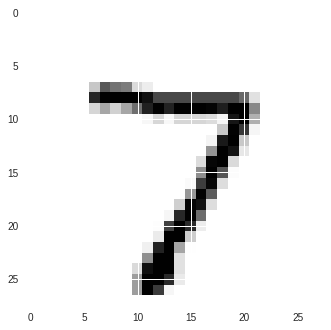

In [0]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0].reshape(28,28))

In [0]:
top_k = results.argsort()[-3:][::-1]

In [0]:
print(top_k)

[7 9 1]


*BINGO*!